## Kernel-Based Ridge Regression

Kernel-based methods can be extended to various inference problems. After covering kernel-based constructions for the perceptron and SVM classifiers, we now apply kernel-based approaches to ridge regression, Principal Component Analysis (PCA), and other learning problems.

### Ridge Regression

Consider $N$ data points $\{(y^{(m)}, \mathbf{x}^{(m)})\}$, where $y^{(m)}$ is a real-valued target and $\mathbf{x}^{(m)}$ is an $M$-dimensional feature vector. We aim to solve the following $\ell_2$-regularized least-squares problem:

$$
\mathbf{w}_{N-1} = \arg\min_{\mathbf{w} \in \mathbb{R}^M} \left( \rho_0 \lambda^N \|\mathbf{w}\|^2 + \sum_{m=0}^{N-1} \lambda^{N-1-m} \left( y^{(m)} - (\mathbf{x}^{(m)})^T \mathbf{w} \right)^2 \right)
$$

Here, $\rho_0 > 0$ is a regularization parameter and $0 \ll \lambda \leq 1$ is a scalar forgetting factor. The solution $\mathbf{w}_{N-1}$ can be used to make predictions for new inputs $\mathbf{x}$ through the linear model:

$$
\hat{y} = \mathbf{x}^T \mathbf{w}_{N-1}
$$

However, linear mappings may not always be appropriate. Kernel-based ridge regression transforms the feature vectors $\{\mathbf{x}^{(m)}\}$ into higher-dimensional vectors $\{\phi(\mathbf{x}^{(m)})\}$ and solves the regression problem in this transformed space. The prediction for a new input $\mathbf{x}$ is given by:

$$
\hat{y} = (\phi(\mathbf{x}))^T \mathbf{w}_{N-1}
$$

This method allows us to employ more complex, nonlinear models without explicitly computing the transformed vectors.



### Using the Gram Matrix

From the linear least-squares solution, the weight vector $\mathbf{w}_{N-1}$ satisfies:

$$
(\rho_0 \lambda^N \mathbf{I} + \mathbf{H}_{N-1}^T \Lambda_{N-1} \mathbf{H}_{N-1}) \mathbf{w}_{N-1} = \mathbf{H}_{N-1}^T \Lambda_{N-1} \mathbf{d}_{N-1}
$$

where $\mathbf{H}_{N-1}$ is the data matrix, $\mathbf{d}_{N-1}$ is the target vector, and $\Lambda_{N-1}$ is a diagonal weighting matrix. The prediction for the target vector is:

$$
\hat{\mathbf{d}}_{N-1} = \mathbf{H}_{N-1} \mathbf{w}_{N-1}
$$

We can express the solution using the Gram matrix $\mathbf{B}_{N-1} = \mathbf{H}_{N-1} \mathbf{H}_{N-1}^T$:

$$
\mathbf{w}_{N-1} = \mathbf{H}_{N-1}^T \Lambda_{N-1} \alpha_{N-1}
$$

$$
\alpha_{N-1} = (\rho_0 \lambda^N \mathbf{I} + \mathbf{B}_{N-1} \Lambda_{N-1})^{-1} \mathbf{d}_{N-1}
$$

This formulation suggests that the predictions can be made using the Gram matrix $\mathbf{B}_{N-1}$ without explicit feature vectors.



### Kernel-Based Least Squares

Consider the regularized least-squares problem in the transformed domain:

$$
\mathbf{w}_{N-1} = \arg\min_{\mathbf{w} \in \mathbb{R}^{M'}} \left( \rho_0 \lambda^N \|\mathbf{w}\|^2 + \sum_{m=0}^{N-1} \lambda^{N-1-m} \left( y^{(m)} - (\phi(\mathbf{x}^{(m)}))^T \mathbf{w} \right)^2 \right)
$$

Repeating the previous derivation, we obtain similar expressions with the kernel-based Gram matrix $\mathbf{A}_{N-1}$:

$$
[\mathbf{A}_{N-1}]_{m,m'} = K(\mathbf{x}^{(m)}, \mathbf{x}^{(m')})
$$

$$
\hat{\mathbf{d}}_{N-1} = \mathbf{A}_{N-1} \Lambda_{N-1} \alpha_{N-1}
$$

$$
\alpha_{N-1} = (\rho_0 \lambda^N \mathbf{I} + \mathbf{A}_{N-1} \Lambda_{N-1})^{-1} \mathbf{d}_{N-1}
$$

Given a test vector $\mathbf{x}$, we can predict its target variable as follows:

$$
\hat{y}(\mathbf{x}) = \sum_{m=0}^{N-1} \lambda^{N-1-m} \alpha^{(m)} K(\mathbf{x}, \mathbf{x}^{(m)})
$$

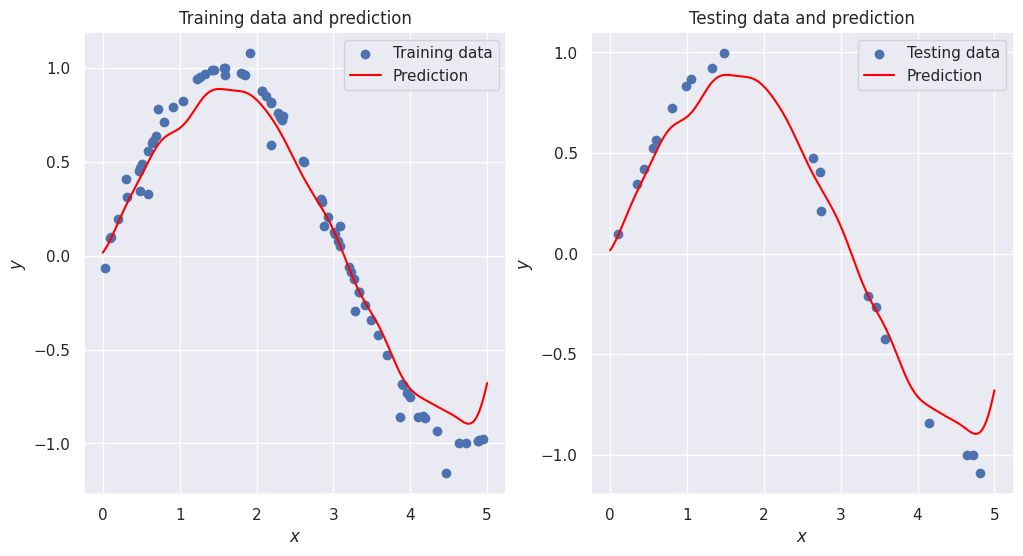

In [4]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 0.5 * (0.5 - np.random.rand(20))  # Add noise to targets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Kernel Ridge Regression model
kr = KernelRidge(kernel='rbf', alpha=1.0, gamma=10)
kr.fit(X_train, y_train)

# Predict
X_plot = np.linspace(0, 5, 1000)[:, None]
y_plot = kr.predict(X_plot)
y_train_pred = kr.predict(X_train)
y_test_pred = kr.predict(X_test)

# Plot results
sns.set_theme()
plt.figure(figsize=(12, 6), dpi=100)

# Plot training data and prediction
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_plot, y_plot, color='red', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Training data and prediction')
plt.legend()

# Plot testing data and prediction
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Testing data')
plt.plot(X_plot, y_plot, color='red', label='Prediction')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Testing data and prediction')
plt.legend()

plt.show()



### Conclusion

Kernel-based ridge regression allows us to handle nonlinear relationships between features and target variables by transforming the feature space using kernel functions. This approach provides flexibility and power in modeling complex data without explicitly computing the transformed feature vectors.